In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
pip install tensorflow

In [32]:
# Import the necessary library
import pandas as pd

# Define the data path
data_path = '/content/drive/My Drive/Final-Uni-Project/Language-Identification-in-songs/Chara-Based-Model/Jupyter-Scripts/DataSets/Main_Full_Corrected_Updated_Lyrics_Training_Data (1).xlsx'

# Load the dataset
data = pd.read_excel(data_path)

# Display the first few rows to understand its structure
print(data.head())


                                              lyrics language_label Artist
0  I morgonens första ljus,\ndär tystnaden bryts ...             SW    GPT
1  В лучах заката мы встретились, не случайно,\nН...             RU    GPT
2  꿈속의 세계는 눈부시게 아름다워,\n현실의 벽 너머로 손을 뻗어.\n별빛 아래 속삭...             KO    GPT
3  En el pueblo donde nací, las calles cuentan hi...             ES    GPT
4  Под широким небом земли разных,\nМы встречаемс...             RU    GPT


In [33]:
# Import the necessary library
import pandas as pd



# Load the dataset from the Excel file
data = pd.read_excel(data_path)

# Display the first few rows to understand its structure
print(data.head())

# Split the 'language_label' by commas, strip spaces, explode the resulting lists into separate rows, and then get the counts of each language
language_counts = data['language_label'].str.split(',').explode().str.strip().value_counts()

# Print the counts of each language
print(language_counts)


                                              lyrics language_label Artist
0  I morgonens första ljus,\ndär tystnaden bryts ...             SW    GPT
1  В лучах заката мы встретились, не случайно,\nН...             RU    GPT
2  꿈속의 세계는 눈부시게 아름다워,\n현실의 벽 너머로 손을 뻗어.\n별빛 아래 속삭...             KO    GPT
3  En el pueblo donde nací, las calles cuentan hi...             ES    GPT
4  Под широким небом земли разных,\nМы встречаемс...             RU    GPT
language_label
AR    9
KO    8
RU    7
SW    6
PT    6
DE    5
HI    4
ES    3
IT    3
FR    3
Name: count, dtype: int64


In [34]:
import unicodedata
import re

def normalize_text(texts):
    normalized_texts = []
    # Expanded set of punctuation to keep based on linguistic relevance
    keep_punctuation = {"'", "-", "’", ":", ",", ".", "!", "?", ";"}

    for text in texts:
        try:
            text = str(text).lower()
            text = ' '.join(text.split())

            # Retain letters, numbers, spaces, and specified punctuation, considering multilingual characters
            text = ''.join(
                char for char in text
                if unicodedata.category(char)[0] in ('L', 'N', 'Z')  # Letter, number, or space
                or char in keep_punctuation
            )

            # Remove standalone numbers that may not contribute significantly to language identification
            text = re.sub(r'\b\d+\b', ' ', text)

            text = re.sub(r'[\.\,\!\?\;\:]+(?=[\.\,\!\?\;\:])', '', text)

            # Ensure there are no extra spaces created by the replacements above
            text = ' '.join(text.split())

            normalized_texts.append(text)
        except Exception as e:
            print(f"Error processing text: {text} with error {e}")
            normalized_texts.append("")  # Append an empty string to indicate an issue

    return normalized_texts


data['lyrics_normalized'] = normalize_text(data['lyrics'].tolist())

print(data[['lyrics', 'lyrics_normalized']].head())


                                              lyrics  \
0  I morgonens första ljus,\ndär tystnaden bryts ...   
1  В лучах заката мы встретились, не случайно,\nН...   
2  꿈속의 세계는 눈부시게 아름다워,\n현실의 벽 너머로 손을 뻗어.\n별빛 아래 속삭...   
3  En el pueblo donde nací, las calles cuentan hi...   
4  Под широким небом земли разных,\nМы встречаемс...   

                                   lyrics_normalized  
0  i morgonens första ljus, där tystnaden bryts a...  
1  в лучах заката мы встретились, не случайно, на...  
2  꿈속의 세계는 눈부시게 아름다워, 현실의 벽 너머로 손을 뻗어. 별빛 아래 속삭임,...  
3  en el pueblo donde nací, las calles cuentan hi...  
4  под широким небом земли разных, мы встречаемся...  


In [35]:
# Extract all unique language codes from the 'language_label' column
unique_languages = set()
data['language_label'].apply(lambda labels: unique_languages.update(labels))

# Sort and list the languages to have a consistent order
unique_languages = sorted(list(unique_languages))

# Create a mapping of languages to indices
language_to_index = {lang: idx for idx, lang in enumerate(unique_languages)}

print(f"Unique languages in dataset: {unique_languages}")
print(f"Language to index mapping: {language_to_index}")


Unique languages in dataset: ['A', 'D', 'E', 'F', 'H', 'I', 'K', 'O', 'P', 'R', 'S', 'T', 'U', 'W']
Language to index mapping: {'A': 0, 'D': 1, 'E': 2, 'F': 3, 'H': 4, 'I': 5, 'K': 6, 'O': 7, 'P': 8, 'R': 9, 'S': 10, 'T': 11, 'U': 12, 'W': 13}


In [36]:
import numpy as np

def labels_to_array(labels, language_to_index):
    # Initialize an array of zeros
    label_array = np.zeros(len(language_to_index), dtype=int)
    # Set positions corresponding to the label to 1
    for label in labels:
        if label in language_to_index:  # Safety check
            label_array[language_to_index[label]] = 1
    return label_array

# Apply the conversion to the entire dataset
data['labels_array'] = data['language_label'].apply(lambda labels: labels_to_array(labels, language_to_index))

# Check the first few entries to ensure correctness
print(data[['language_label', 'labels_array']].head())


  language_label                                labels_array
0             SW  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
1             RU  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
2             KO  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
3             ES  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
4             RU  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [37]:
from sklearn.model_selection import train_test_split

# Prepare the features and labels for splitting
X = data['lyrics_normalized'].values
y = np.stack(data['labels_array'].values)

# Split the data into training and testing sets, then split the training set further into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 32
Validation set size: 11
Testing set size: 11


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Precision, Recall

# Parameters
vocab_size = 10000
max_length = 100
embedding_dim = 128
output_dim = len(unique_languages)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')

X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')

# Define a custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Model Definition
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dense(output_dim, activation='sigmoid')  # Use 'sigmoid' for multi-label classification
])

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', Precision(), Recall(), F1Score()])

model.summary()

# Model Training
history = model.fit(X_train_padded, y_train,
                    epochs=100,
                    validation_data=(X_val_padded, y_val))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 14)                910       
                                                                 
Total params: 1330318 (5.07 MB)
Trainable params: 1330318 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.0938 - precision_8: 0.1057 - recall_8: 0.3750 - f1_score: 0.1649

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


1/1 [==============================] - 8s 8s/step - loss: 0.6937 - accuracy: 0.0938 - precision_8: 0.1057 - recall_8: 0.3750 - f1_score: 0.1649 - val_loss: 0.6912 - val_accuracy: 0.0909 - val_precision_8: 0.1311 - val_recall_8: 0.3636 - val_f1_score: 0.1928
Epoch 2/100
1/1 [==============================] - 0s 294ms/step - loss: 0.6912 - accuracy: 0.1562 - precision_8: 0.1818 - recall_8: 0.4688 - f1_score: 0.2620 - val_loss: 0.6898 - val_accuracy: 0.0909 - val_precision_8: 0.1277 - val_recall_8: 0.2727 - val_f1_score: 0.1739
Epoch 3/100
1/1 [==============================] - 0s 246ms/step - loss: 0.6886 - accuracy: 0.2812 - precision_8: 0.3103 - recall_8: 0.5625 - f1_score: 0.4000 - val_loss: 0.6883 - val_accuracy: 0.0909 - val_precision_8: 0.1429 - val_recall_8: 0.2273 - val_f1_score: 0.1754
Epoch 4/100
1/1 [==============================] - 0s 325ms/step - loss: 0.6858 - accuracy: 0.3438 - precision_8: 0.4699 - recall_8: 0.6094 - f1_score: 0.5306 - val_loss: 0.6866 - val_accuracy: 0.

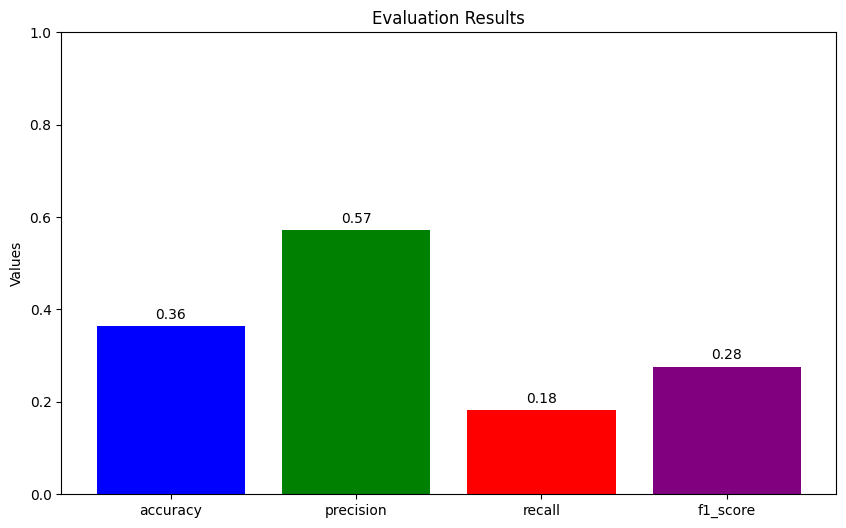

In [39]:
import matplotlib.pyplot as plt

metrics_names = ['loss', 'accuracy', 'precision', 'recall', 'f1_score']  # Adjust according to the metrics you have compiled your model with

# Extract the metrics other than loss (starting from index 1 if index 0 is loss)
results = eval_results[1:]  # This assumes loss is at index 0, adjust if your setup is different
metrics_names = metrics_names[1:]  # Adjusting to skip 'loss'

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, results, color=['blue', 'green', 'red', 'purple'])  # Colors as in your example
for i, v in enumerate(results):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')  # Add text on top of the bars

plt.ylim(0, 1)  # Assuming the metric values are between 0 and 1
plt.title('Evaluation Results')
plt.ylabel('Values')
plt.show()
